# Аналіз сезонності запитів, пов’язаних із симптомами та лікуванням (Google Trends, Україна)

In [1]:
!pip install pytrends

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [31]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='uk-UA', tz=180)

def get_trends(keywords, timeframe='today 12-m', geo='UA'):
    pytrends.build_payload(keywords, timeframe=timeframe, geo=geo)
    df = pytrends.interest_over_time()
    return df

### Trends

In [33]:
group_top = ['температура', 'кашель', 'грип', 'орві', 'ангіна']

In [35]:
group_mid = ['головний біль', 'біль у горлі', 'нежить', 'діарея', 'герпес']

In [95]:
group_behav = ['як збити температуру', 'таблетки від горла', 'грип лікування', 'швидка допомога', 'кашель у дитини']

### Diagrams

/opt/anaconda3/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


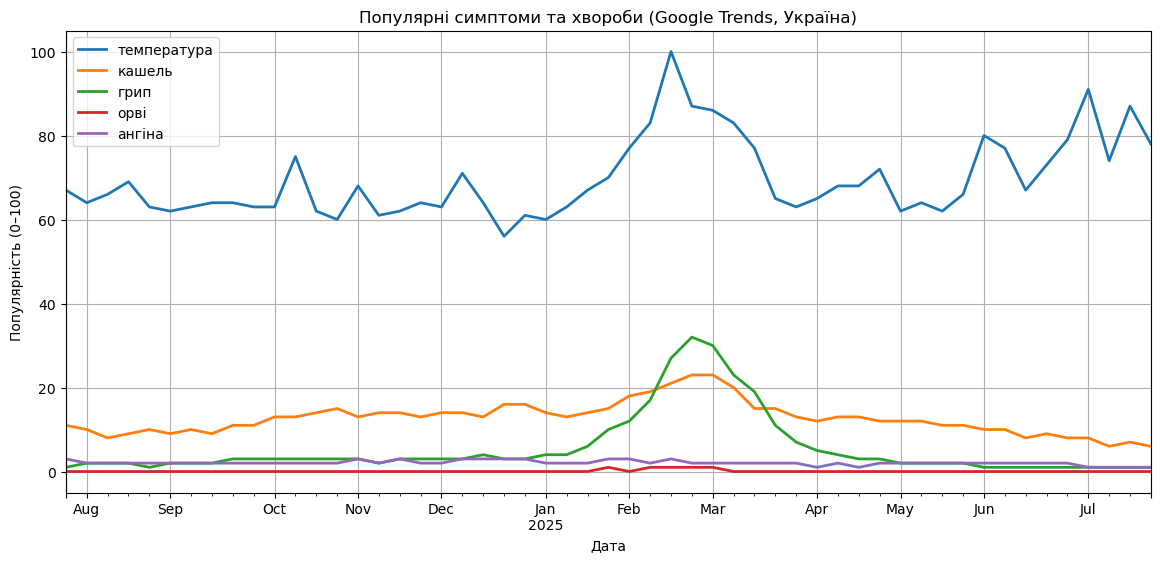

In [103]:
df_top = get_trends(group_top)
df_top = df_top.drop(columns='isPartial')
df_top.plot(figsize=(14, 6), linewidth=2)
plt.title('Популярні симптоми та хвороби (Google Trends, Україна)')
plt.xlabel('Дата')
plt.ylabel('Популярність (0–100)')
plt.grid(True)
plt.savefig('symptoms_trends_ua.png', dpi=300, bbox_inches='tight')
plt.show()

### Найбільш популярним симптомом серед українців протягом року залишалась “температура”. Спостерігається сезонний пік у лютому-березні 2025 року, що співпадає з типовим грипозним періодом.

/opt/anaconda3/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


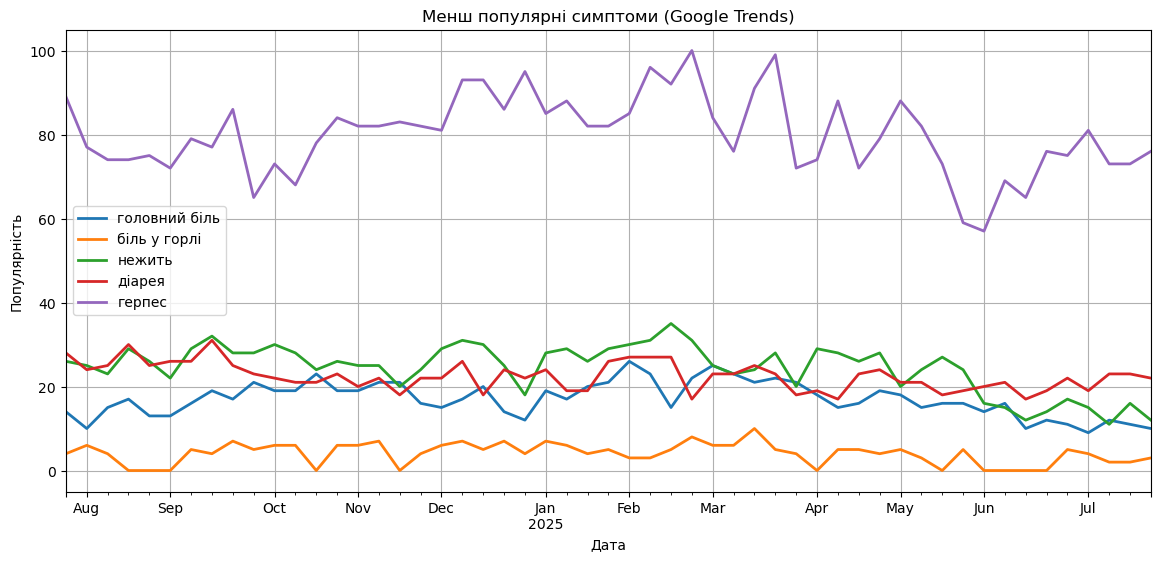

In [105]:
df_mid = get_trends(group_mid).drop(columns='isPartial')
df_mid.plot(figsize=(14, 6), linewidth=2)
plt.title('Менш популярні симптоми (Google Trends)')
plt.xlabel('Дата')
plt.ylabel('Популярність')
plt.grid(True)
plt.savefig('search_actions_ua.png', dpi=300, bbox_inches='tight')
plt.show()

### Герпес стабільно тримає високу популярність, незалежно від сезонності, на відміну від більш ситуативних запитів на кшталт “нежить” чи “біль у горлі

/opt/anaconda3/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


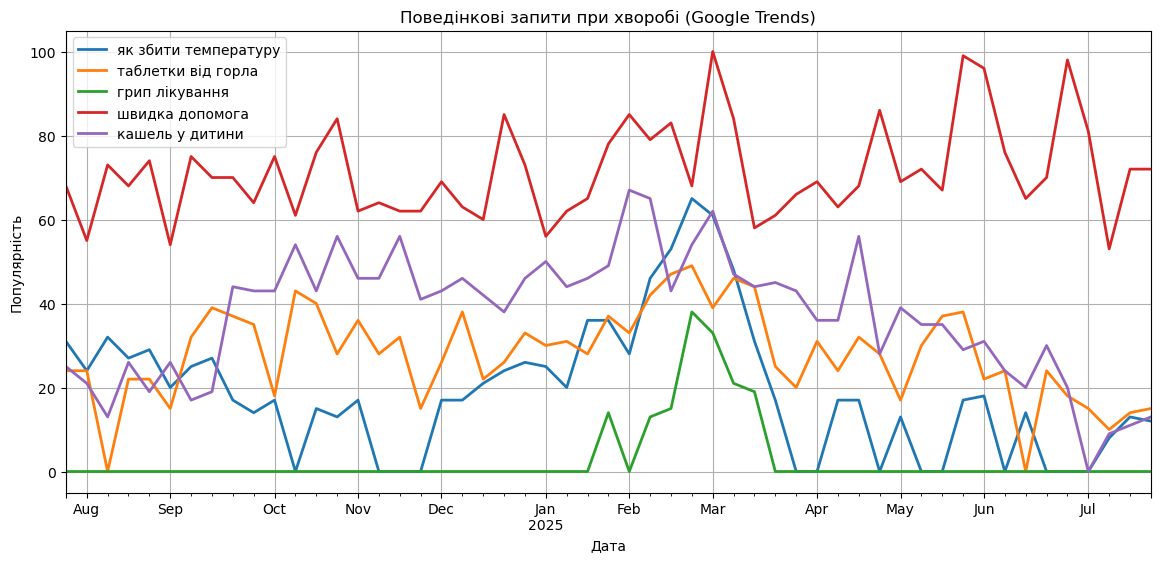

In [107]:
df_behav = get_trends(group_behav).drop(columns='isPartial')
df_behav.plot(figsize=(14, 6), linewidth=2)
plt.title('Поведінкові запити при хворобі (Google Trends)')
plt.xlabel('Дата')
plt.ylabel('Популярність')
plt.grid(True)
plt.savefig('behavior_queries_ua.png', dpi=300, bbox_inches='tight')
plt.show()

### Запит “як збити температуру” демонструє схожий тренд з запитом “грип лікування”, що може свідчити про одночасну симптоматичну активність. Найпопулярнішим залишається запит “швидка допомога”

## Загальні висновки

- Найчастіше українці шукають інформацію про симптом "температура", запит "як збити температуру" та "швидку допомогу".
- Піки запитів щодо грипу та ГРВІ припадають на лютий-березень, що відповідає сезонному підйому захворюваності.
- Висока частотність запиту "герпес" є нетиповою й вказує на його постійну актуальність.

 Цей аналіз демонструє, як дані Google Trends можуть слугувати індикатором для моніторингу поширеності симптомів, поведінки користувачів та потенційного навантаження на систему охорони здоров’я.